In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models, torchvision.datasets
from torch.utils.data import DataLoader, random_split

import torchvision.models as models

In [2]:
!pip install kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadhamza0403","key":"0833d946374c60adcb595bd0c1254b8c"}'}

In [7]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset
! unzip microsoft-catsvsdogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

In [16]:
! rm /content/PetImages/Cat/666.jpg
! rm /content/PetImages/Dog/11702.jpg

rm: cannot remove '/content/PetImages/Cat/666.jpg': No such file or directory
rm: cannot remove '/content/PetImages/Dog/11702.jpg': No such file or directory


In [14]:
path = '/content/PetImages'

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((256, 256)),
    torchvision.transforms.ToTensor()
])

data = torchvision.datasets.ImageFolder(path, transform=transform)

# Split datasets into train, validation, and test sets
n = len(data)
train_data, val_data, test_data = random_split(data, [int(0.7*n) + 2, int(0.15*n), int(0.15*n)])

# DataLoaders for train, validation, and test sets
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

torch.Size([3, 256, 256]) tensor(1)


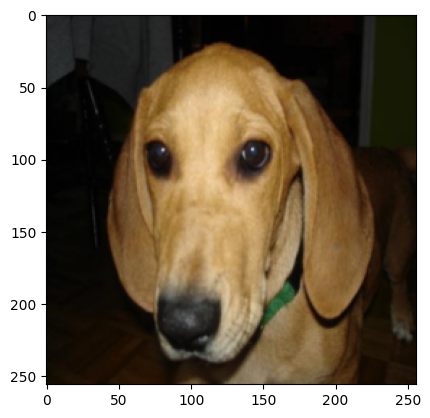

In [17]:
for x, t in train_loader:
    print(x[0].shape, t[0])
    plt.imshow(x[0].transpose(2, 0).transpose(0, 1).numpy())
    plt.show()
    break  # Break after displaying the first image

In [18]:
# Load pre-trained VGG model
vgg19 = models.vgg19(pretrained=True)
vgg19.eval()
vgg19

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 74.9MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [19]:
def accuracy(model, data, device="cpu"):
    correct, total = 0, 0
    loader = torch.utils.data.DataLoader(data, batch_size=64)
    model.to(device)
    model.eval()

    for img, t in loader:
        img, t = inputs.to(device), labels.to(device)
        y = model(img)
        _, pred = torch.max(y.data, 1)
        total += t.size(0)
        correct += (pred == t).sum().item()
    return correct / total

Epoch [1/5] - Loss: 0.0948
Epoch [2/5] - Loss: 0.0863
Epoch [3/5] - Loss: 0.0902
Epoch [4/5] - Loss: 0.0855
Epoch [5/5] - Loss: 0.0866


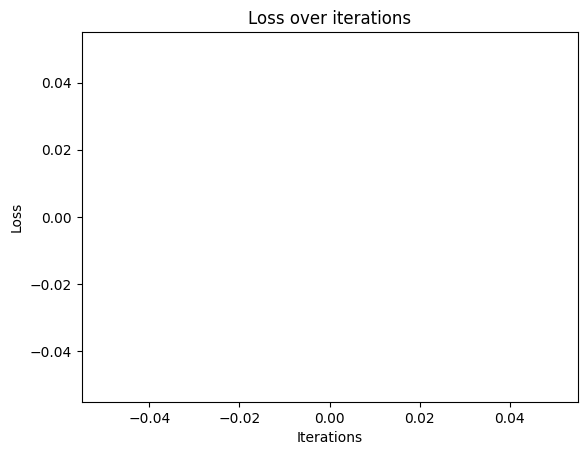

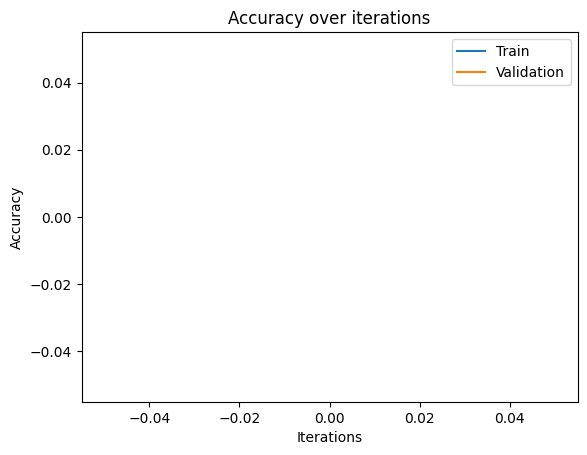

In [22]:
for param in vgg19.parameters():
    param.requires_grad = False

vgg19.classifier[6] = nn.Linear(4096, 2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg19.parameters(), lr=0.001)

num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg19.to(device)

iters, train_loss, train_acc, val_acc = [], [], [], []
iter_count = 0 # count the number of iterations that has passed

for epoch in range(num_epochs):
    vgg19.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_data)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}")

# Evaluate the model on the validation set
vgg19.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg19(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total

plt.figure()
plt.plot(iters[:len(train_loss)], train_loss)
plt.title("Loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.figure()
plt.plot(iters[:len(train_acc)], train_acc)
plt.plot(iters[:len(val_acc)], val_acc)
plt.title("Accuracy over iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

In [23]:
! pip install pyyaml h5py

In [26]:
torch.save(vgg19.state_dict(), 'model.h5')

In [28]:
import shutil
shutil.move('model.h5', '/content/drive/My Drive/model/model.h5')

'/content/drive/My Drive/model/model.h5'

In [ ]:
vgg19.save_weights('/content')